In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import sys

In [2]:
try:
    datacomuni = pd.read_excel('./datasets/Comuni _python.xlsx', header=7, usecols=[0,2,4])
except FileNotFoundError:
    print("File Comuni _python.xlsx non trovato.")
    sys.exit()

In [3]:
#Pulizia dei dati comuni
datacomuni['Regione'] = datacomuni['Regione'].str.strip().str.title()
datacomuni=datacomuni[:-1]
datacomuni.dropna(how='all', inplace=True)
datacomuni['Denominazione'] = datacomuni['Denominazione'].astype(str)
datacomuni.isna().sum()

Denominazione      0
Regione            0
Popolazione2011    0
dtype: int64

datacomuni.head(10)

In [5]:
try:
    datacovprovince = pd.read_csv('./datasets/covid19_italy_province _python.csv')
except FileNotFoundError:
    print("File covid19_italy_province _python.csv non trovato.")
    sys.exit()

datacovprovince.head(10)

In [7]:
try:
    datacovregioni = pd.read_csv('./datasets/covid19_italy_region _python.csv')
except FileNotFoundError:
    print("File covid19_italy_region _python.csv non trovato.")
    sys.exit()

datacovregioni.head(10)

try:
    dataripgeo = pd.read_csv('Ripartizione_geografica.csv', sep=';')
except FileNotFoundError:
    print("File Ripartizione_geografica.csv non trovato.")
    sys.exit()

In [10]:
file_path = './datasets/Ripartizione-geografica _python.txt'

dataripgeo = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

output_csv_path = './datasets/dataripgeo.csv'
dataripgeo.to_csv(output_csv_path, index=False)

print(f"File CSV salvato come: {output_csv_path}")

File CSV salvato come: ./datasets/dataripgeo.csv


In [11]:
dataripgeo.head(10)

,Codice Regione,Ripartizione geografica,Regione
0,1,Nord-ovest,Piemonte
1,2,Nord-ovest,Valle d'Aosta/Vallée d'Aoste
2,3,Nord-ovest,Lombardia
3,4,Nord-est,Trentino-Alto Adige/Südtirol
4,5,Nord-est,Veneto
5,6,Nord-est,Friuli-Venezia Giulia
6,7,Nord-ovest,Liguria
7,8,Nord-est,Emilia-Romagna
8,9,Centro,Toscana
9,10,Centro,Umbria


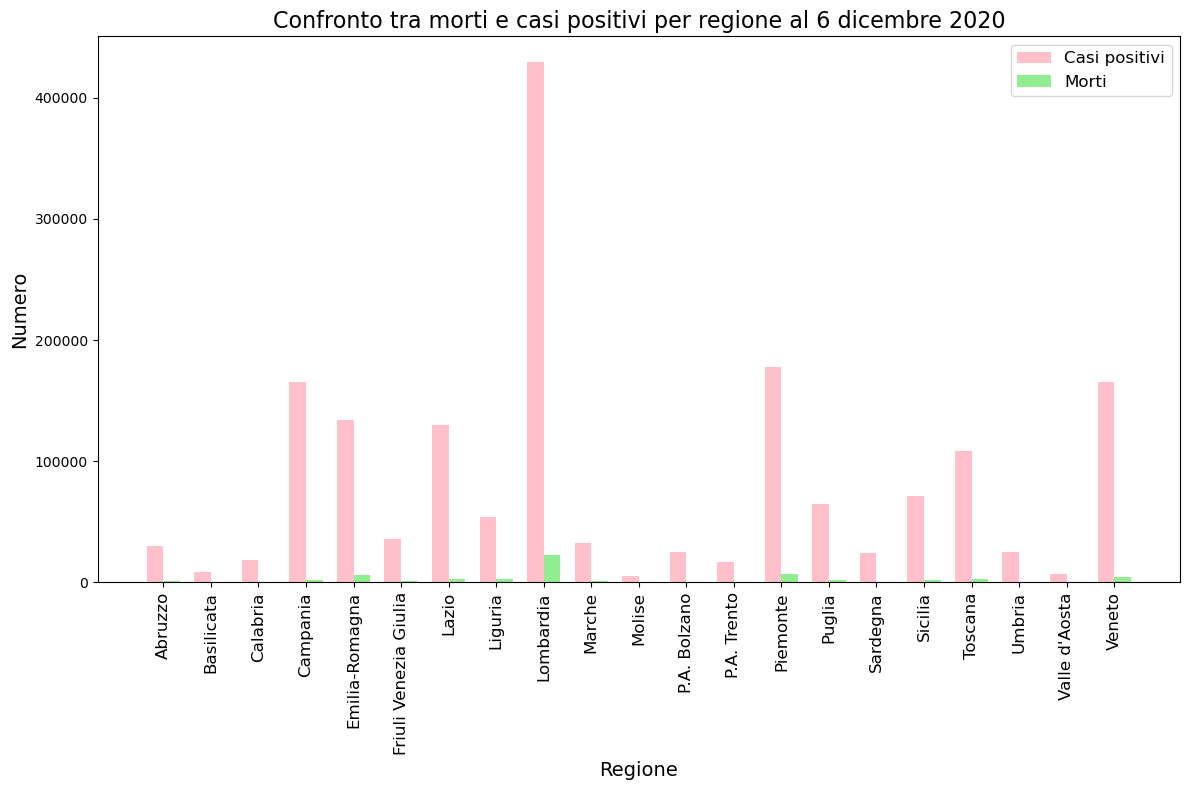

In [12]:
#Confronto tra morti e casi positivi per regione al 6 dicembre 2020
data_6_dicembre = datacovregioni[datacovregioni["Date"] == "2020-12-06T17:00:00"]
totcasipositivi_6_dicembre = data_6_dicembre.groupby("RegionName")["TotalPositiveCases"].sum()
totmorti_6_dicembre = data_6_dicembre.groupby("RegionName")["Deaths"].sum()
bar_width = 0.35
index = np.arange(len(totcasipositivi_6_dicembre.index))

fig, ax = plt.subplots(figsize=(12, 8))
bar1 = ax.bar(index, totcasipositivi_6_dicembre.values, bar_width, label='Casi positivi', color='pink')
bar2 = ax.bar(index + bar_width, totmorti_6_dicembre.values, bar_width, label='Morti', color='lightgreen')

plt.xlabel('Regione', fontsize=14)
plt.ylabel('Numero', fontsize=14)
plt.title('Confronto tra morti e casi positivi per regione al 6 dicembre 2020', fontsize=16)
plt.xticks(index + bar_width / 2, totcasipositivi_6_dicembre.index, rotation=90, fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
totpoplombardia = datacomuni[datacomuni["Regione"] == "Lombardia"]["Popolazione2011"].sum()
totpoplombardia

9704151.0

In [14]:
mortilombardia = datacovregioni[(datacovregioni["RegionName"] == "Lombardia") & (datacovregioni["Date"] == "2020-12-06T17:00:00")]["Deaths"].values[0]
mortilombardia

23024

In [15]:
guaritilombardia = datacovregioni[(datacovregioni["RegionName"] == "Lombardia") & (datacovregioni["Date"] == "2020-12-06T17:00:00")]["Recovered"].values[0]
guaritilombardia

289706

In [16]:
totpositivilombardia = datacovregioni[(datacovregioni["RegionName"] == "Lombardia") & (datacovregioni["Date"] == "2020-12-06T17:00:00")]["TotalPositiveCases"].values[0]
totpositivilombardia

429109

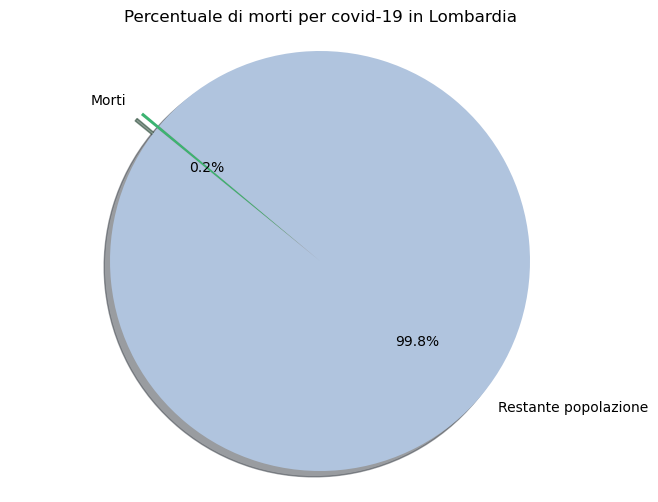

In [17]:
#Grafico a torta di percentuale di morti per covid-19 in Lombardia
data = {'Categoria': ['Morti', 'Restante popolazione'],
        'Valore': [mortilombardia, totpoplombardia - mortilombardia]}
df = pd.DataFrame(data)

sizes = [mortilombardia, totpoplombardia - mortilombardia]
labels = ['Morti', 'Restante popolazione']
colors = ['mediumseagreen', 'lightsteelblue']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentuale di morti per covid-19 in Lombardia')
plt.axis('equal')  
plt.show()

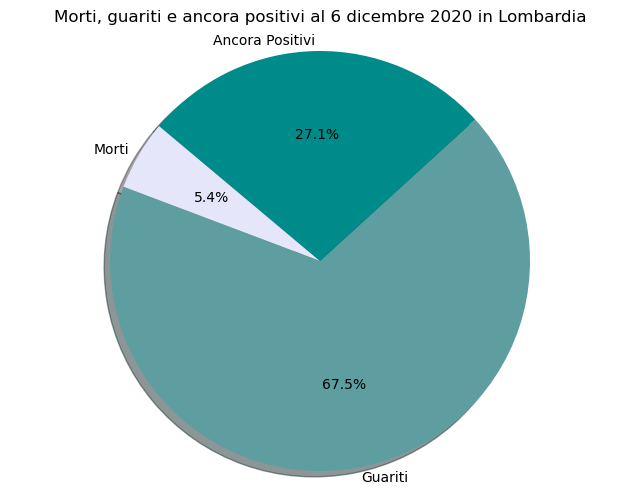

In [18]:
# Grafico a torta per dimostrare morti, guariti e ancora positivi al 6 dicembre 2020 in Lombardia
labels = ['Morti', 'Guariti', 'Ancora Positivi']
sizes = [mortilombardia, guaritilombardia, totpositivilombardia-mortilombardia-guaritilombardia]
colors = ['lavender', 'cadetblue', 'darkcyan']
explode = (0, 0, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, labeldistance=1.05)
plt.title('Morti, guariti e ancora positivi al 6 dicembre 2020 in Lombardia') # calcolato sul totale dei positivi al 6/12, tutti i dati sono cumulati
plt.axis('equal') 
plt.gcf().patch.set_facecolor('none')
plt.show() 

In [19]:
#Calcolo media nazionale di nuovi casi positivi
mediaNazionaleNuoviCasi = round(datacovregioni["NewPositiveCases"].mean())
mediaNazionaleNuoviCasi

287

In [20]:
#Calcolo media nazionale di test effettuati
mediaNazionaleTest = round(datacovregioni["TestsPerformed"].mean())
mediaNazionaleTest

260081

In [21]:
#Calcolo media di nuovi casi positivi in Lombardia
dataLombardia = datacovregioni[datacovregioni["RegionName"] == "Lombardia"]
mediaNuoviCasiLombardia = round(dataLombardia["NewPositiveCases"].mean())
mediaNuoviCasiLombardia

1495

In [22]:
#Calcolo media di test effettuati in Lombardia
mediaTestLombardia = round(dataLombardia["TestsPerformed"].mean())
mediaTestLombardia

1026507

In [23]:
dataMolise = datacovregioni[datacovregioni["RegionName"] == "Molise"]
mediaNuoviCasiMolise = round(dataMolise["NewPositiveCases"].mean())
mediaNuoviCasiMolise

18

In [24]:
mediaTestMolise = round(dataMolise["TestsPerformed"].mean())
mediaTestMolise

34124

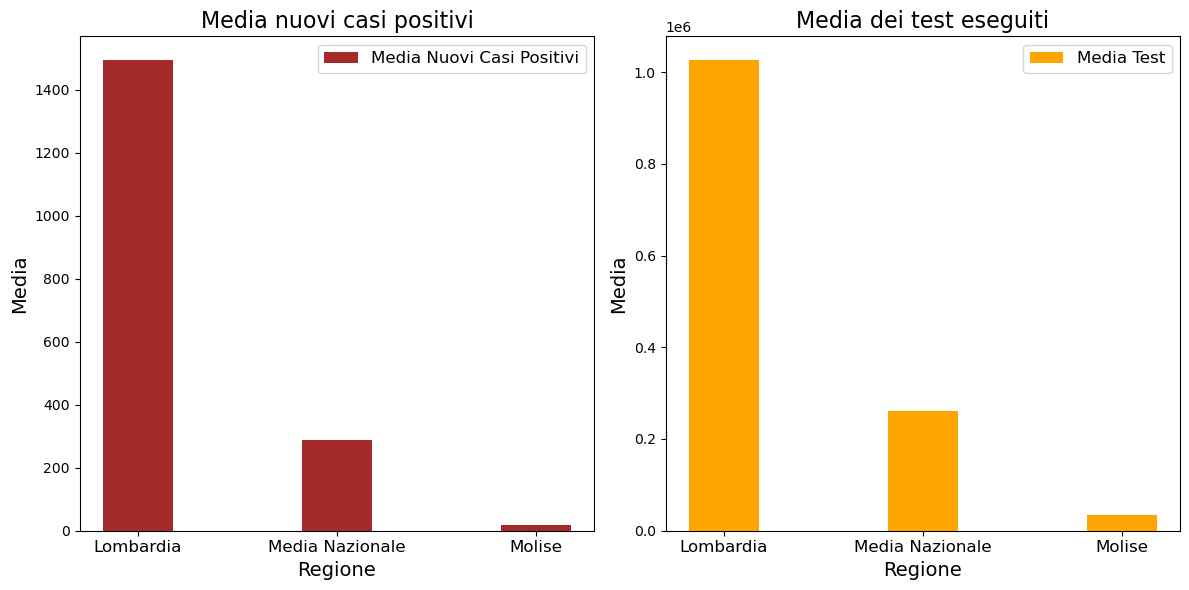

In [25]:
# Confronto fra Lombardia e Molise per nuovi casi positivi e test eseguiti
regioni = ["Lombardia", "Media Nazionale", "Molise"]
media_nuovi_casi = [mediaNuoviCasiLombardia, mediaNazionaleNuoviCasi, mediaNuoviCasiMolise]
media_test = [mediaTestLombardia, mediaNazionaleTest, mediaTestMolise]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


bar_width = 0.35
index = range(len(regioni))
ax1.bar(index, media_nuovi_casi, bar_width, label='Media Nuovi Casi Positivi', color='brown')
ax1.set_xlabel('Regione', fontsize=14)
ax1.set_ylabel('Media', fontsize=14)
ax1.set_title('Media nuovi casi positivi', fontsize=16)
ax1.set_xticks(index)
ax1.set_xticklabels(regioni, fontsize=12)
ax1.legend(fontsize=12)


ax2.bar(index, media_test, bar_width, label='Media Test', color='orange')
ax2.set_xlabel('Regione', fontsize=14)
ax2.set_ylabel('Media', fontsize=14)
ax2.set_title('Media dei test eseguiti', fontsize=16)
ax2.set_xticks(index)
ax2.set_xticklabels(regioni, fontsize=12)
ax2.legend(fontsize=12)

plt.tight_layout()  
plt.show()


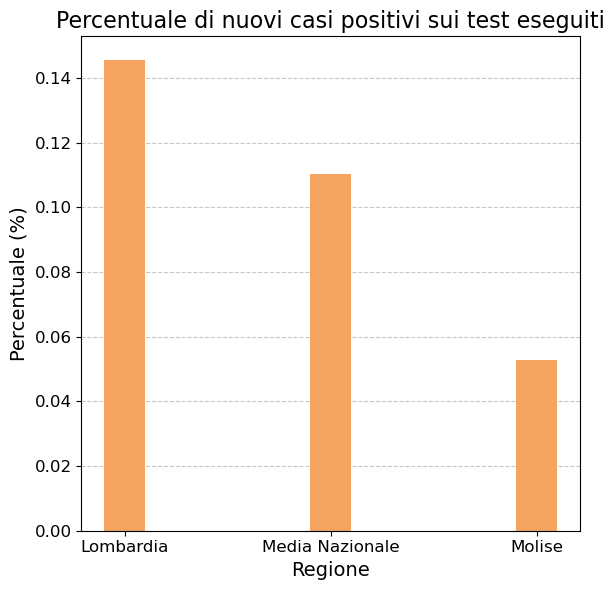

In [26]:
# Grafico a barre con percentuale di nuovi casi positivi sui test eseguiti
percentuale_positivi_su_test = [(nuovi_casi_positivi / test_eseguiti) * 100 
                               for nuovi_casi_positivi, test_eseguiti in zip(media_nuovi_casi, media_test)]

plt.figure(figsize=(6, 6))
plt.bar(regioni, percentuale_positivi_su_test, color='sandybrown', width=0.2)
plt.xlabel('Regione', fontsize=14)
plt.ylabel('Percentuale (%)', fontsize=14)
plt.title('Percentuale di nuovi casi positivi sui test eseguiti', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().set_axisbelow(True)
plt.show()

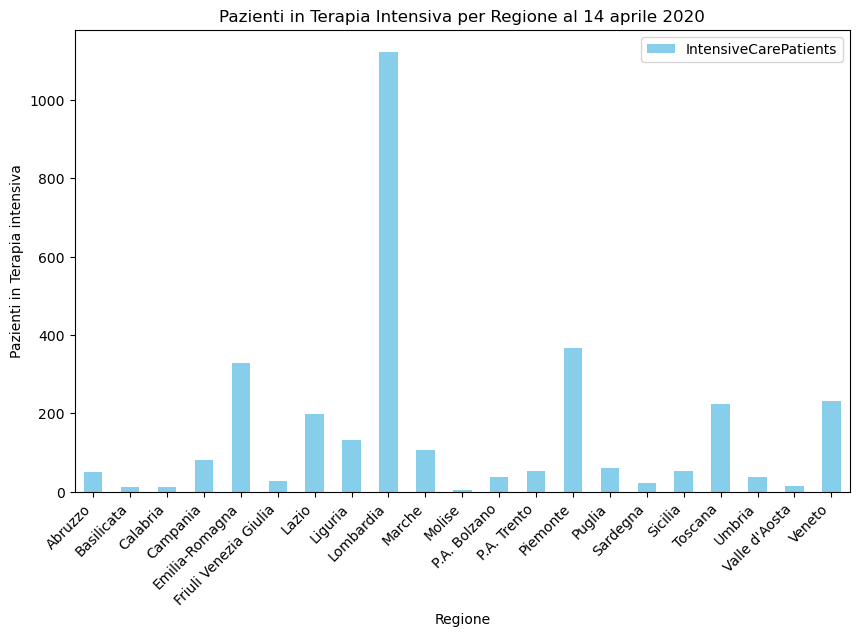

In [27]:
# Grafico a barre con pazienti in Terapia Intensiva per Regione al 14 aprile 2020
selected_date = "2020-04-14T17:00:00"
data_aprile = datacovregioni[datacovregioni['Date'] == selected_date]
ax = data_aprile.plot(x='RegionName', y='IntensiveCarePatients', kind='bar', color='skyblue', figsize=(10, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Pazienti in Terapia Intensiva per Regione al 14 aprile 2020')
plt.xlabel('Regione')
plt.ylabel('Pazienti in Terapia intensiva')
plt.show()

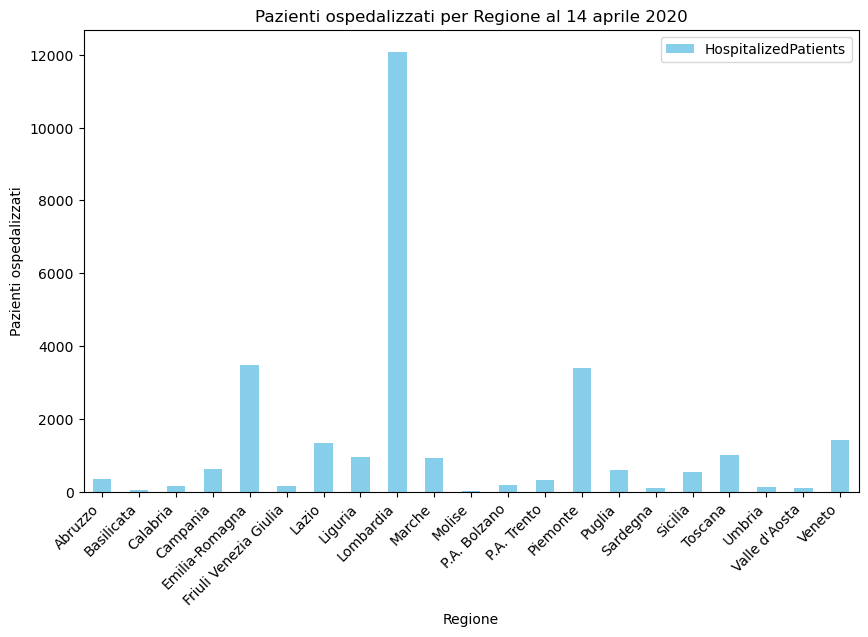

In [29]:
#Pazienti ospedalizzati per Regione al 14 aprile 2020
selected_date = "2020-04-14T17:00:00"
data_aprile = datacovregioni[datacovregioni['Date'] == selected_date]
ax = data_aprile.plot(x='RegionName', y='HospitalizedPatients', kind='bar', color='skyblue', figsize=(10, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Pazienti ospedalizzati per Regione al 14 aprile 2020')
plt.xlabel('Regione')
plt.ylabel('Pazienti ospedalizzati')
plt.show()

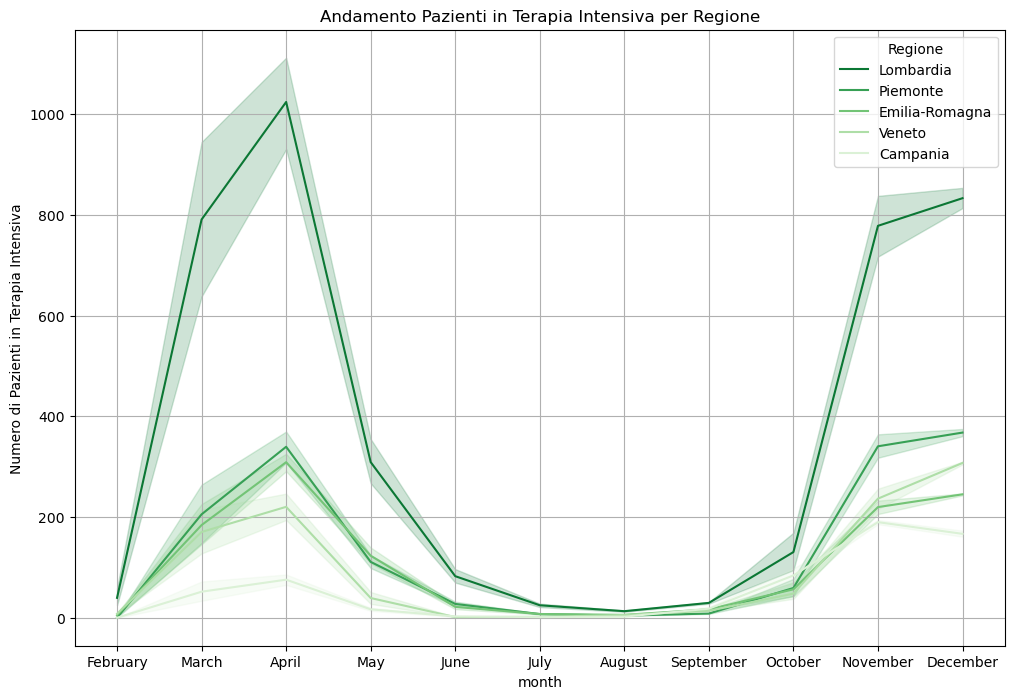

In [30]:
# Andamento Pazienti in Terapia Intensiva per Regione
datacovregioni['Date'] = pd.to_datetime(datacovregioni['Date'])
datacovregioni['month'] = datacovregioni['Date'].dt.month_name()

plt.figure(figsize=(12, 8))

specific_regions = ['Lombardia', 'Piemonte', 'Emilia-Romagna', 'Veneto', 'Campania']
palette = sns.color_palette('Greens', n_colors=len(specific_regions))[::-1]

# itera sui valori univoci delle regioni e rappresenta una linea per ciascuna
for region, color in zip(specific_regions, palette):
    region_data = datacovregioni[datacovregioni['RegionName'] == region]
    sns.lineplot(x='month', y='IntensiveCarePatients', data=region_data, label=region, color=color)

plt.title('Andamento Pazienti in Terapia Intensiva per Regione')
plt.ylabel('Numero di Pazienti in Terapia Intensiva')
plt.legend(title='Regione', bbox_to_anchor=(1, 1))
plt.grid()
plt.gcf().patch.set_facecolor('none')
plt.show()

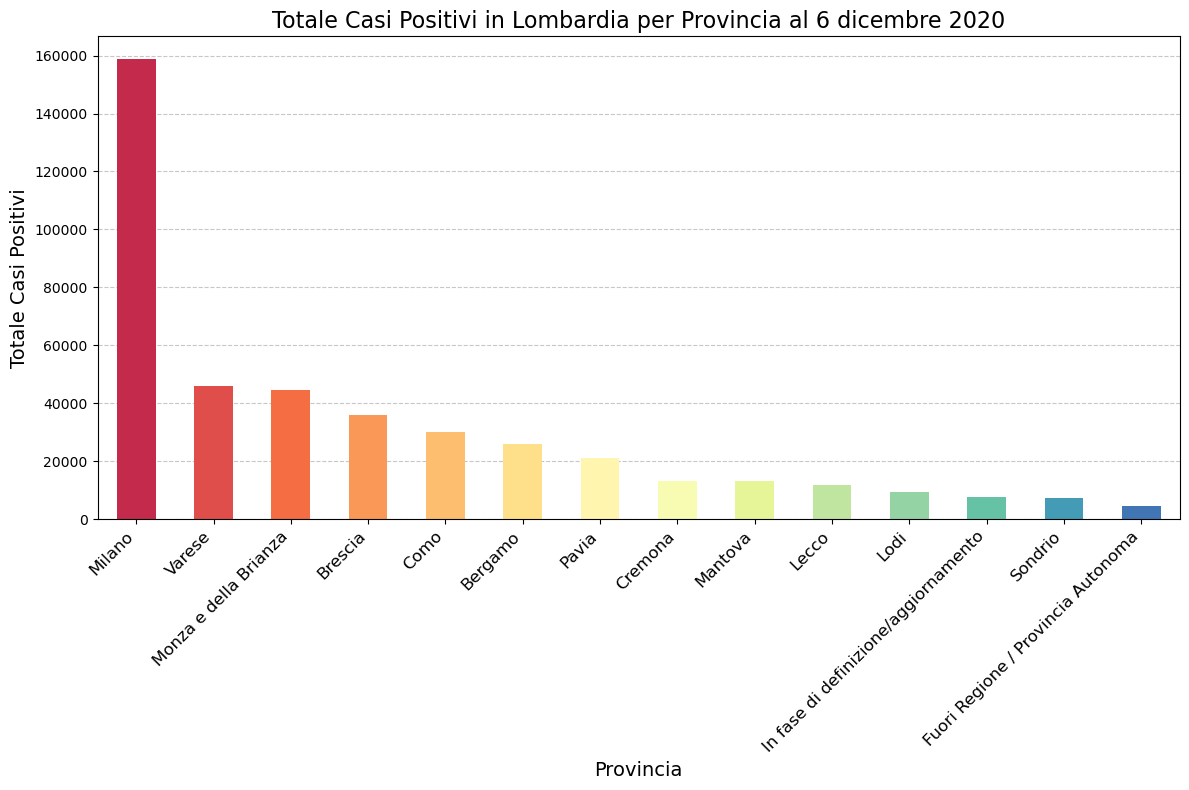

In [31]:
#Totale Casi Positivi in Lombardia per Provincia al 6 dicembre 2020
casi_positivi_lombardia_6_dicembre = datacovprovince[(datacovprovince['RegionName'] == 'Lombardia') & (datacovprovince['Date'] == '2020-12-06T17:00:00')]
totale_casi_positivi_province_lombardia_6_dicembre = casi_positivi_lombardia_6_dicembre.groupby('ProvinceName')['TotalPositiveCases'].sum()

# ordina il DataFrame in base al totale dei casi positivi
totale_casi_positivi_province_lombardia_6_dicembre_sorted = totale_casi_positivi_province_lombardia_6_dicembre.sort_values(ascending=False)
province_names = totale_casi_positivi_province_lombardia_6_dicembre_sorted.index

plt.figure(figsize=(12, 8))
#palette = sns.color_palette('rocket', n_colors=len(province_names))
palette = sns.color_palette('Spectral', n_colors=len(province_names))
totale_casi_positivi_province_lombardia_6_dicembre_sorted.plot(kind='bar', color=palette)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Totale Casi Positivi', fontsize=14)
plt.title('Totale Casi Positivi in Lombardia per Provincia al 6 dicembre 2020', fontsize=16)
plt.xticks(range(len(province_names)), province_names, rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.show()

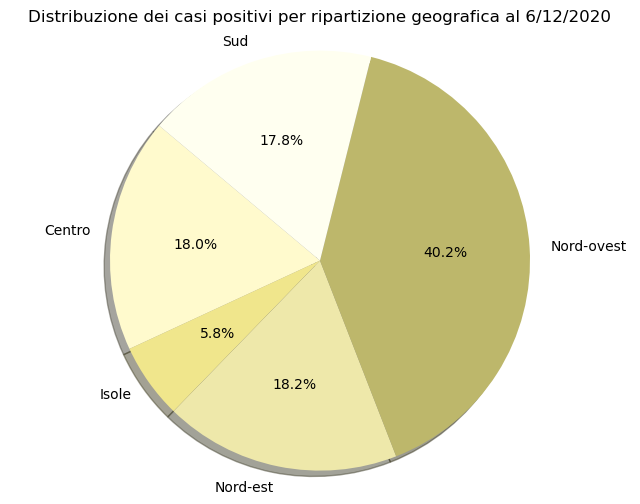

In [32]:
#Grafico a torta per distribuzione dei casi positivi per ripartizione geografica al 6/12/2020
selected_date = "2020-12-06T17:00:00"
data_covid_selected = datacovregioni[datacovregioni['Date'] == selected_date]
data_covid_merge = pd.merge(data_covid_selected, dataripgeo, left_on='RegionName', right_on='Regione')
data_covid_sum = data_covid_merge.groupby('Ripartizione geografica')['TotalPositiveCases'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(data_covid_sum['TotalPositiveCases'], labels=data_covid_sum['Ripartizione geografica'], autopct='%1.1f%%', shadow=True, startangle=140, colors=['lemonchiffon', 'khaki','palegoldenrod','darkkhaki', 'ivory'])
plt.title('Distribuzione dei casi positivi per ripartizione geografica al 6/12/2020')
plt.axis('equal')  
plt.show() # grafico a torta che mostra la distribuzione dei casi positivi per ripartizione geografica al 6 dicembre 2020

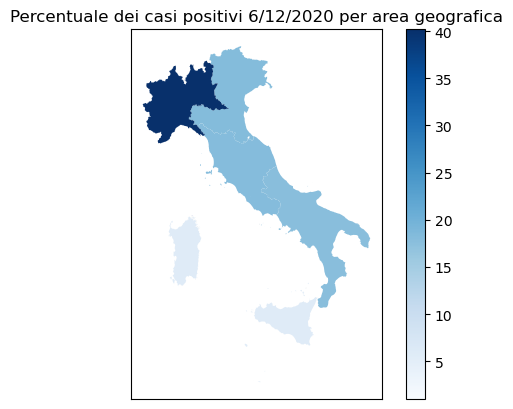

In [88]:
#Visualizzzare mappa per la distribuzione dei casi positivi per ripartizione geografica al 6 dicembre 2020
data_covid_sum['Ripartizione geografica'] = data_covid_sum['Ripartizione geografica'].str.title()
data_covid_sum['percentuale'] = data_covid_sum['TotalPositiveCases']/data_covid_sum['TotalPositiveCases'].sum()*100
italia_geo = gpd.read_file('./datasets/RipGeo01012023_g_WGS84.geojson')
mappa2 = pd.merge(data_covid_sum, italia_geo, left_on='Ripartizione geografica', right_on='DEN_RIP', how='left')
gdf2 = gpd.GeoDataFrame(mappa2, geometry='geometry')
gdf2.plot(column='percentuale', cmap='Blues', legend=True, aspect='auto', vmin=1)
plt.xticks([])
plt.yticks([])
plt.title("Percentuale dei casi positivi 6/12/2020 per area geografica")
plt.show()

In [34]:
# set column date as index
datacovregioni["Date"] = pd.to_datetime(datacovregioni["Date"])
datacovregioni.set_index("Date", inplace=True)

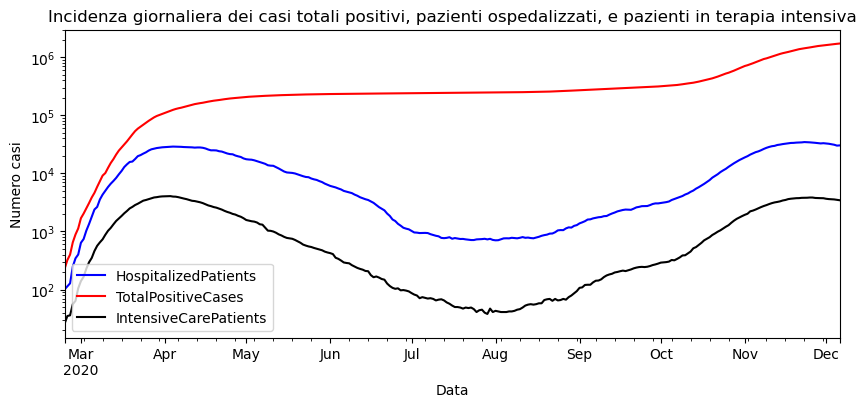

In [35]:
#Incidenza giornaliera dei casi totali positivi, pazienti ospedalizzati, e pazienti in terapia intensiva
plt.figure(figsize=(10, 4))
datacovregioni.resample("D")["HospitalizedPatients"].sum().plot(kind="line", color='blue')
datacovregioni.resample("D")["TotalPositiveCases"].sum().plot(kind="line", color='red')
datacovregioni.resample("D")["IntensiveCarePatients"].sum().plot(kind="line", color='black')
plt.ylabel('Numero casi')
plt.yscale('log')
plt.xlabel('Data')
plt.legend(loc ='best')
plt.title('Incidenza giornaliera dei casi totali positivi, pazienti ospedalizzati, e pazienti in terapia intensiva')
plt.show()

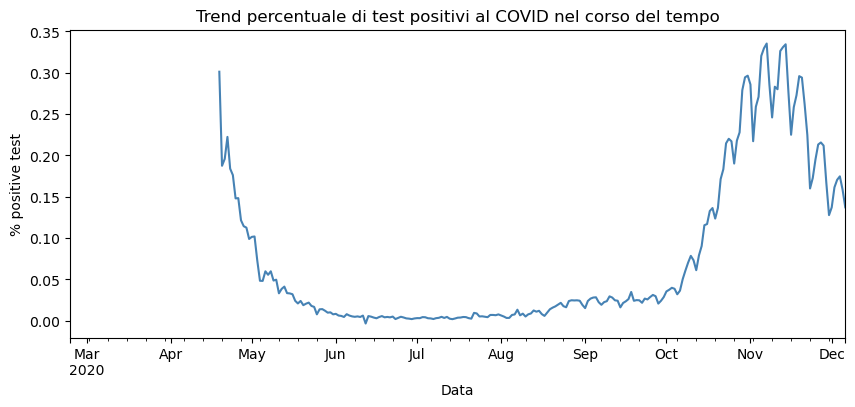

In [36]:
#Trend percentuale di test positivi al COVID nel corso del tempo
plt.figure(figsize=(10, 4))
datacovregioni['percentNuoviCasiSuTest']= datacovregioni["NewPositiveCases"]/datacovregioni["TestsPerformed"]*100
datacovregioni.resample("D")["percentNuoviCasiSuTest"].mean().plot(kind="line", color='steelblue')
plt.ylabel('% positive test')
plt.xlabel('Data')
plt.title('Trend percentuale di test positivi al COVID nel corso del tempo')
plt.show()

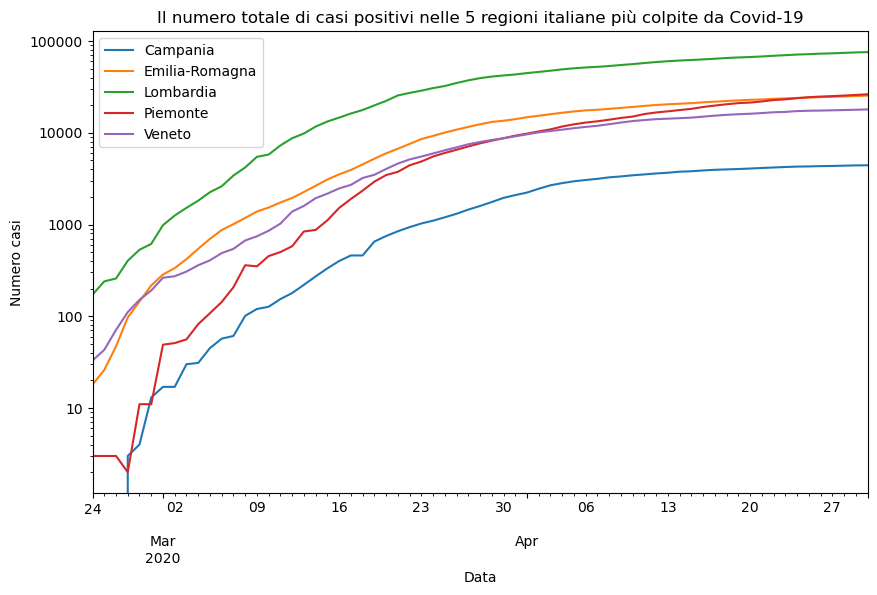

In [37]:
# Andamento dei casi positivi nelle 5 regioni italiane più colpite da Covid-19
data_3m = datacovregioni[datacovregioni.index.month <= 4]
regioni_colpiti=['Lombardia', 'Piemonte', 'Campania', 'Veneto', 'Emilia-Romagna']
data_3m_grouped = data_3m[data_3m['RegionName'].isin(regioni_colpiti)].groupby('RegionName')
plt.figure(figsize=(10, 6))
for name, group in data_3m_grouped:
    group.resample("D")["TotalPositiveCases"].mean().plot(kind="line", label=name)
plt.ylabel('Numero casi')
plt.yscale('log')
plt.xlabel('Data')
plt.legend(loc='best')
plt.title('Il numero totale di casi positivi nelle 5 regioni italiane più colpite da Covid-19')
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.show()

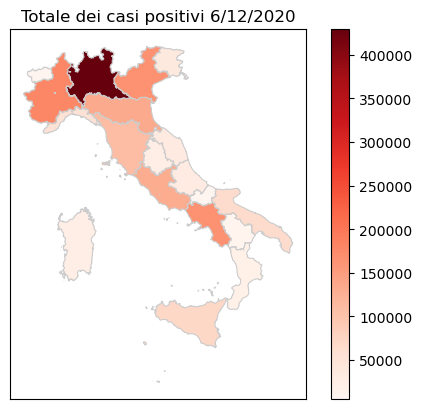

In [38]:
# Mappa dei regioni italiani con totale dei casi positivi al 6 dicembre 
#sort by index (date in descending order), then groupby regions and take 1st row  for each (6 dic). 
region_sorted = datacovregioni.sort_index(ascending=False)
regions_last = region_sorted.groupby('RegionName').first()
#https://github.com/openpolis/geojson-italy/blob/master/geojson/limits_IT_regions.geojson 
regioni_geo = gpd.read_file('./datasets/limits_IT_regions.geojson')
mappa = pd.merge(regions_last, regioni_geo, left_on='RegionCode', right_on='reg_istat_code_num', how='left')
gdf = gpd.GeoDataFrame(mappa, geometry='geometry')
gdf.plot(column='TotalPositiveCases', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Totale dei casi positivi 6/12/2020")
plt.show()

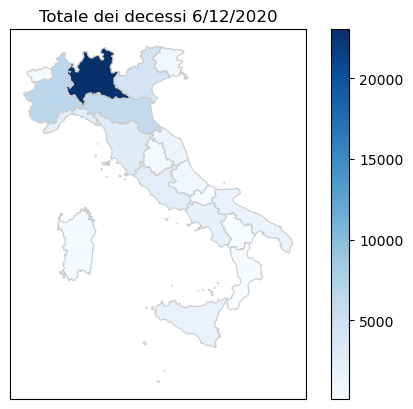

In [39]:
# Mappa dei regioni italiani per decessi fino al 6 dicembre
gdf.plot(column='Deaths', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Totale dei decessi 6/12/2020")
plt.show()

In [40]:
# COVID e inquinamento dell'aria
# Dati dal sito https://inemar.arpalombardia.it/inemar/webdata/elab_standard_reg.seam?cid=4995 file 2019_RL2_risultati_prov_inq.xls Emissioni 2019 di inquinanti tradizionali in Lombardia suddivise per Provincia
emissioni = pd.read_csv('./datasets/emissioni.csv', sep=';', header=0)
emissioni=emissioni.iloc[1:]
province_sorted2 = datacovprovince[datacovprovince['Date']=='2020-04-14T17:00:00']
prov_emis_apr= pd.merge(emissioni, province_sorted2, left_on='Provincia', right_on='ProvinceAbbreviation', how='left')

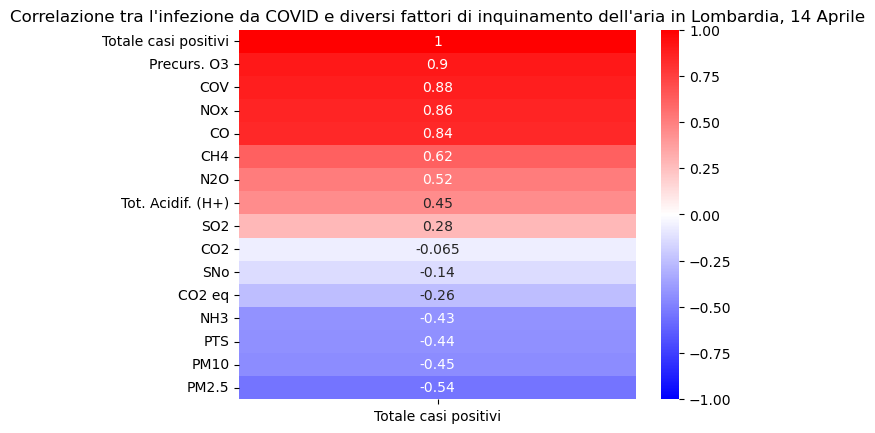

In [41]:
# correlazione tra l'infezione da COVID e diversi fattori di inquinamento dell'aria in Lombardia, 14 Aprile
emis_selected =prov_emis_apr[['TotalPositiveCases', 'SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3',
       'PM2.5', 'PM10', 'PTS', 'CO2 eq', 'Precurs. O3', 'Tot. Acidif. (H+)',
       'SNo']]
emis_selected = emis_selected.rename(columns={
    'TotalPositiveCases': 'Totale casi positivi'})

emis_selected.corr()[['Totale casi positivi']].sort_values(by='Totale casi positivi', ascending=False)
sns.heatmap(emis_selected.corr()[['Totale casi positivi']].sort_values(by='Totale casi positivi', ascending=False), vmin=-1, vmax=1, annot=True, cmap='bwr')
plt.title("Correlazione tra l'infezione da COVID e diversi fattori di inquinamento dell'aria in Lombardia, 14 Aprile")
plt.show()

In [42]:
# Analisi di correlazione tra Covid e densita popolazione
# preparazione e pulizia dei dati statistiche su comuni scaricati da ISTAT
comuni_stat = pd.read_csv('./datasets/Classificazioni statistiche-e-dimensione-dei-comuni_31_12_2019.csv', sep = ';')
comuni_stat.dropna(how='all', inplace=True)
comuni_stat.isna().sum()
comuni_stat['Popolazione residente al 31/12/2019'] = comuni_stat['Popolazione residente al 31/12/2019'].str.replace('.', '').astype(int)
comuni_stat['Superficie territoriale (kmq) al 01/01/2019'] = comuni_stat['Superficie territoriale (kmq) al 01/01/2019'].str.replace('.', '').str.replace(',', '.').astype(float)
comuni_stat['density'] = comuni_stat['Popolazione residente al 31/12/2019']/comuni_stat['Superficie territoriale (kmq) al 01/01/2019']
comuni_stat = comuni_stat[['Codice Regione', 'Codice Istat del Comune \n(formato numerico)', 'Denominazione (Italiana e straniera)', 'Superficie territoriale (kmq) al 01/01/2019', 'Popolazione residente al 31/12/2019', 'Grado di urbanizzazione', 'density']]

In [43]:
# preparazione dei dati su province, poi merge con dataset comuni_stat
province_clean = datacovprovince [['Date', 'RegionCode',
       'ProvinceName',
       'TotalPositiveCases']]
province_apr = province_clean[province_clean.Date =='2020-04-14T17:00:00']
province_dens = pd.merge(comuni_stat, province_apr, left_on="Denominazione (Italiana e straniera)", right_on='ProvinceName', how='inner')
selected = province_dens[['TotalPositiveCases', 'density', 'Grado di urbanizzazione','Popolazione residente al 31/12/2019']]
# Rename the columns to Italian
selected = selected.rename(columns={
    'TotalPositiveCases': 'Totale casi positivi',
    'density': 'Densità popolazione',
    'Grado di urbanizzazione': 'Grado di Urbanizzazione',
    'Popolazione residente al 31/12/2019': 'Popolazione Residente'
})

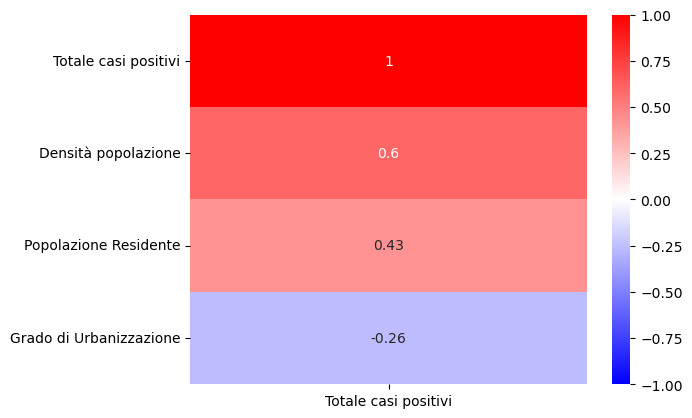

In [44]:
# Heatmap di correlazione tra Covid e densita popolazione
selected.corr()[['Totale casi positivi']].sort_values(by='Totale casi positivi', ascending=False)
heatmap_dens= sns.heatmap(selected.corr()[['Totale casi positivi']].sort_values(by='Totale casi positivi', ascending=False), vmin=-1, vmax=1, annot=True, cmap='bwr')
plt.show(heatmap_dens)